This notebook does the following:
1. display image samples;
2. load images as numpy arrays.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
from IPython.display import display, Image
import random

from skimage import io
from skimage.transform import resize

import numpy as np
import pandas as pd

## Data Processing

In [2]:
train_dir = 'data/train'
test_dir = 'data/test'

In [3]:
def disp_samples(data_folder, sample_size):
    image_filenames = os.listdir(data_folder)
    image_sample = random.sample(image_filenames, sample_size)
    for image_filename in image_sample:
        image_path = os.path.join(data_folder, image_filename)
        image = Image(filename=image_path)
        print(image_filename)
        display(image)

Take a look at 10 random samples.

cat.5449.jpg


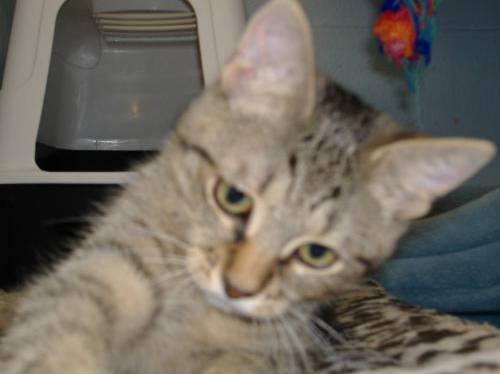

dog.348.jpg


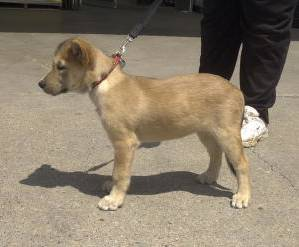

cat.859.jpg


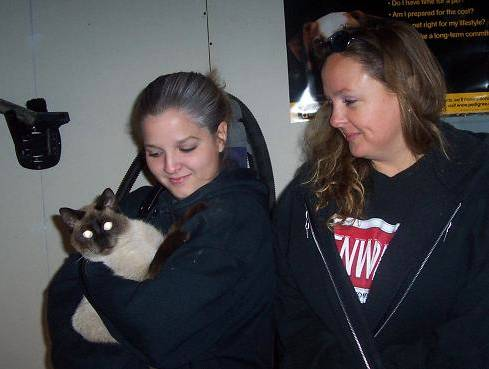

cat.10138.jpg


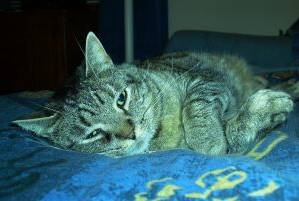

cat.8007.jpg


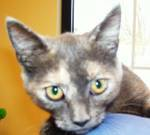

dog.10600.jpg


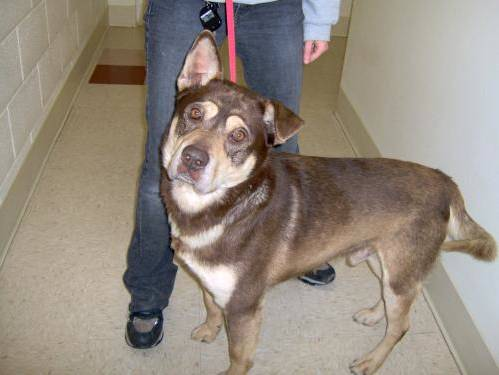

dog.3941.jpg


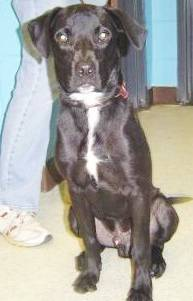

dog.426.jpg


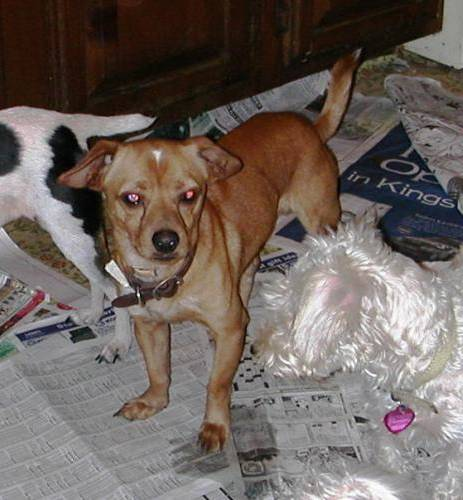

dog.7059.jpg


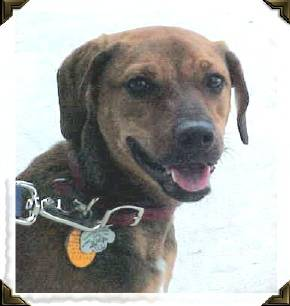

dog.10769.jpg


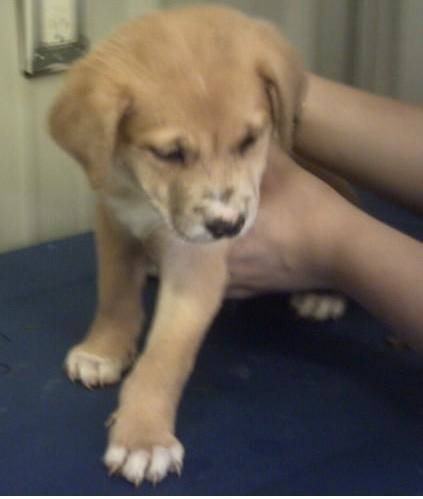

In [4]:
disp_samples(train_dir, 10)

To run the notebook on kaggle, I used only the first 1000 images. If full dataset is to be used, set `partial=False`.

In [5]:
image_size = 100 # Pixel width and height.

def load_image(data_folder, partial=True):
    image_filenames = os.listdir(data_folder)
    
    if partial:
        image_filenames = image_filenames[:1000] 
    
    num_images = len(image_filenames)
    dataset = np.ndarray(shape=(num_images, image_size, image_size, 3), dtype=float)
    dataset_labels = []
    
    for image_index, image_filename in enumerate(image_filenames):
        image_path = os.path.join(data_folder, image_filename)
        
        image = io.imread(image_path)
        image = resize(image, (image_size, image_size))
    
        dataset[image_index, :, :, :] = image
    
    return dataset

In [6]:
train_dataset = load_image(train_dir)

Check the shape of the training set.

In [ ]:
print(train_dataset.shape)

Create one hot encoding for labels.

In [ ]:
labels = [[1., 0.] if 'dog' in name else [0., 1.] for name in os.listdir(train_dir)]

In [ ]:
print(len(labels))